# Web-based Image Visualization

## Learning objectives

- Understand the capabilities and limitations of **img, canvas, WebGL, WebAssembly,** and **WebGPU** browser technologies
- Identify the trade-offs in **server-side** and **client-side** rendering
- Become familiar with **open source, web-based scientific image visualization tools** such as: itk-vtk-viewer, itkwidgets, kaibu, imagej.js, matplotlib, ipympl, neuroglancer, and the web-based capabilities of paraview, napari 

## Web browser rendering technologies

### `img` elements

The [HTML `img` element embeds](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/img) an image into a webpage.

*Capabilities:*

- ✔ Ubiquitous support
- ✔ Supported file formats: APNG, AVIF, GIF, JPEG, PNG, SVG, WebP
- ✔ Possible to inline support for base64-encoded images

*Limitations:*

- ✘ Not well suited for dynamic content
- ✘ Does not support multiple pixel component types, anisotropic spacing, 3D images

In [1]:
# Example
import IPython

IPython.display.HTML('<img src="https://interactive-examples.mdn.mozilla.net/media/cc0-images/grapefruit-slice-332-332.jpg">')

### `canvas` elements

The [HTML `canvas` element](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/canvas) is capable of drawing 2D graphics and animations.

*Capabilities:*

- ✔ Ubiquitous support
- ✔ Well suited for dynamic content
- ✔ Low level API
- ✔ Many JS libraries available for high level manipulation

*Limitations:*

- ✘ The Canvas API focuses on 2D graphics
- ✘ Limited performance relative to WebGL, WebGPU

In [2]:
%%javascript
// canvas example
// From: https://developer.mozilla.org/en-US/docs/Web/API/Canvas_API
const canvas = document.createElement('canvas');
const ctx = canvas.getContext('2d');

ctx.fillStyle = 'green';
ctx.fillRect(10, 10, 150, 100);

// `element` is the jQuery element that has the current cell's output
element.get(0).append(canvas)

<IPython.core.display.Javascript object>

### WebGL

Hardware accelerated 2D and 3D graphics that also draws on the `canvas` element.

*Capabilities:*

- ✔ Widespread support
- ✔ Well suited for dynamic content
- ✔ Great performance
- ✔ Low level API
- ✔ JS libraries available for high level manipulation, e.g. vtk.js, three.js
- ✔ 3D support

*Limitations:*

- ✘ Resource limitations based on texture size, number of textures
- ✘ WebGL 1.0 API that closely conforms to OpenGL ES 2.0 
- ✘ WebGL 2.0 API introduces support for much of the OpenGL ES 3.0
- ✘ Legacy technology relative to WebGPU

In [3]:
# WebGL example
# From: https://github.com/InsightSoftwareConsortium/itkwidgets/blob/master/examples/3DImage.ipynb
from urllib.request import urlretrieve
import os

import itk

from itkwidgets import viewo

# Currently required to enable running the itkwidgets window on colab
from google.colab import output
output.enable_custom_widget_manager()


# Download data
file_name = '005_32months_T2_RegT1_Reg2Atlas_ManualBrainMask_Stripped.nrrd'
if not os.path.exists(file_name):
    url = 'https://data.kitware.com/api/v1/file/564a5b078d777f7522dbfaa6/download'
    urlretrieve(url, file_name)
    

image = itk.imread(file_name)
view(image, axes=True, vmin=4000, vmax=17000, gradient_opacity=0.9)

Viewer(axes=True, geometries=[], gradient_opacity=0.9, point_sets=[], rendered_image=<itk.itkImagePython.itkIm…

### WebGPU

WebGPU is the working name for a future web standard and JavaScript API for accelerated graphics and compute, aiming to provide "modern 3D graphics and computation capabilities".

*Capabilities:*

- ✔ Great performance
- ✔ Low level, modern graphics API
- ✔ Can be compiled into SPIR-V, a cross-API intermediate representation
- ✔ 3D support

*Limitations:*

- ✘ Still undergoing standardization
- ✘ New shader language, *WGSL*
- ✘ Not yet broadly available

## Server-side vs client-side rendering

Web-based visualization technologies generally fall into two broad categories:

1. **Server-side rendering**: The data is rendered on a server, and the rendered screenshot is transferred over the network to the client.
2. **Client-side rendering**: The data is rendered on the client. A server may or may not exist. A server may exist to dynamically generate a multi-scale pyramid, etc.

The relative advantages are:

#### Server-side rendering

- ✔ A large server GPU can render for an underpowered client, e.g. a phone.
- ✔ A large server GPU may have more graphics memory for an underpowered client.
- ✔ Custom hardware capabilities and software APIs, e.g. raytracing, can be provided to all clients.
- ✔ There is a shorter path to migrate traditional desktop applications to the web.
- ✔ The raw data does not need to be transferred to the client.

#### Client-side rendering

- ✔ Performance and responsiveness are generally better -- the rendered image and interactive events do not need to be transferred over the network.
- ✔ Infinitely scalable with the number of clients -- the server does not get overloaded.
- ✔ Lower maintenance and resource costs -- a server often is not required.
- ✔ A graphics card or complicated software graphics context is not required on a server.
- ✔ Rendered data does not need to be continually sent over the network when interacting with the image.

## Open source, web-based scientific image visualization tools 

A survey of open source, web-based scientific image visualization tools. Yes, this is an *incomplete* list! :-)

#### Server-side rendering

- [ParaViewWeb](https://kitware.github.io/paraviewweb/index.html) - ParaViewWeb is a Web framework which brings the power of ParaView and VTK into the Web.
- [napari](https://napari.org/) - a multi-dimensional image viewer for python (limited Jupyter support)
- [3D Slicer](https://github.com/Slicer/SlicerJupyter) - 3D Slicer is an open source software platform for medical image informatics, image processing, and three-dimensional visualization (limited Jupyter support)

#### Client-side rendering

- [itk-vtk-viewer](https://kitware.github.io/itk-vtk-viewer/index.html) - ITK/VTK Viewer is an open-source web application for medical and scientific image, mesh, and point set visualization.
- [ImageJ.js](https://ij.imjoy.io/) - ImageJ running in your web browser via WebAssembly, powered by ImJoy.
- [Kaibu](https://kaibu.org/#/app) - Kaibu is a web application for visualizing and annotating multi-dimensional images, built with OpenLayers and itk-vtk-viewer.
- [neuroglancer](https://github.com/google/neuroglancer) - Neuroglancer is a WebGL-based viewer for volumetric data.
- [webKnossos](https://webknossos.org/) A fully cloud- and browser-based 3D annotation tool for distributed large-scale data analysis in light- and electron-microscopy based Connectomics
#### Both

- [matplotlib](https://matplotlib.org/) - the defacto Python visualization library, is capable of both server-side and client-side rendering.
- *Teaser :-O* - itk-vtk-viewer / [itkwidgets](https://github.com/InsightSoftwareConsortium/itkwidgets) will soon be capable of multiple server-side rendering backends in addition to client-side rendering.

**Click me:** [3D cell volume visualized with itk-vtk-viewer](https://kitware.github.io/itk-vtk-viewer/app/?image=https://data.kitware.com/api/v1/file/5f499c5a9014a6d84e9b001d/download/C1-retina.nrrd)

## Exercises

Matplotlib supports multiple rendering backends.

In [6]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


For each of the following rendering backends:

1. `nbagg`
2. `notebook`
4. `inline`
5. `ipympl`
6. `widget`

- Restart the Jupyter kernel (required when switching backends)
- Enable the backend, and plot
- Find the browser technology used client-side with the browser debugging tools
- Determine if matplotlib is using server-side or client-side rendering.

What differences are observed?

<IPython.core.display.Javascript object>


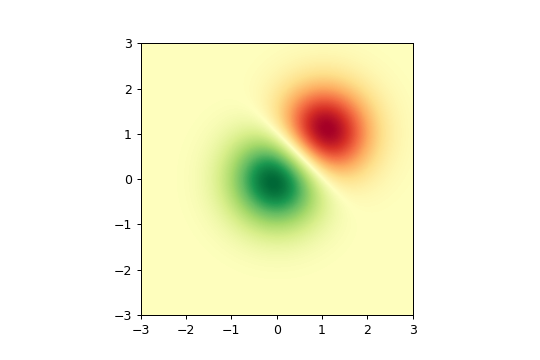

In [2]:
# Image demo from https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/image_demo.htm
def plot_image():
    import numpy as np
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    import matplotlib.cbook as cbook
    from matplotlib.path import Path
    from matplotlib.patches import PathPatch
    import matplotlib.pyplot as plt
    delta = 0.025
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = np.exp(-X**2 - Y**2)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
    Z = (Z1 - Z2) * 2

    fig, ax = plt.subplots()
    im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

    plt.show()
    
%matplotlib nbagg
plot_image()